# Environment & Data Preparation

## Index

1. [Environment](#1_Environment)



2. [Data Preparation](#2_Data_Preparation)
    
   2.1 [Data Wrangling](#2.1_Data_Wrangling)
      - Explore Data
      - Clean Data
      - Transform Data
   
   2.2 [Feature Selection](#2.2_Feature_Selection)
      - Correlation
      - Delete not useful variables
   
   2.3 [Feature Engineering](#2.3_Feature_Engineering)
      - Log transformation
      - StandardScaler
      - Creat new columns (mix columns)

______

# 1_Environment

### Import libraries

In [202]:
import pandas as pd
import numpy as np

import math
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

### Import data

In [203]:
churn= pd.read_csv("Churn_Modelling.csv")

In [204]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2_Data_Preparation

## 2.1_Data_Wrangling

### Explore Data

#### Metadata

**RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)


#### Variables info

In [205]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [206]:
# check variables (numeric & categoric)
numeric= churn.select_dtypes(include=np.number)

In [207]:
numeric

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [208]:
categoric= churn.select_dtypes(exclude=np.number)
categoric

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


#### Outliers

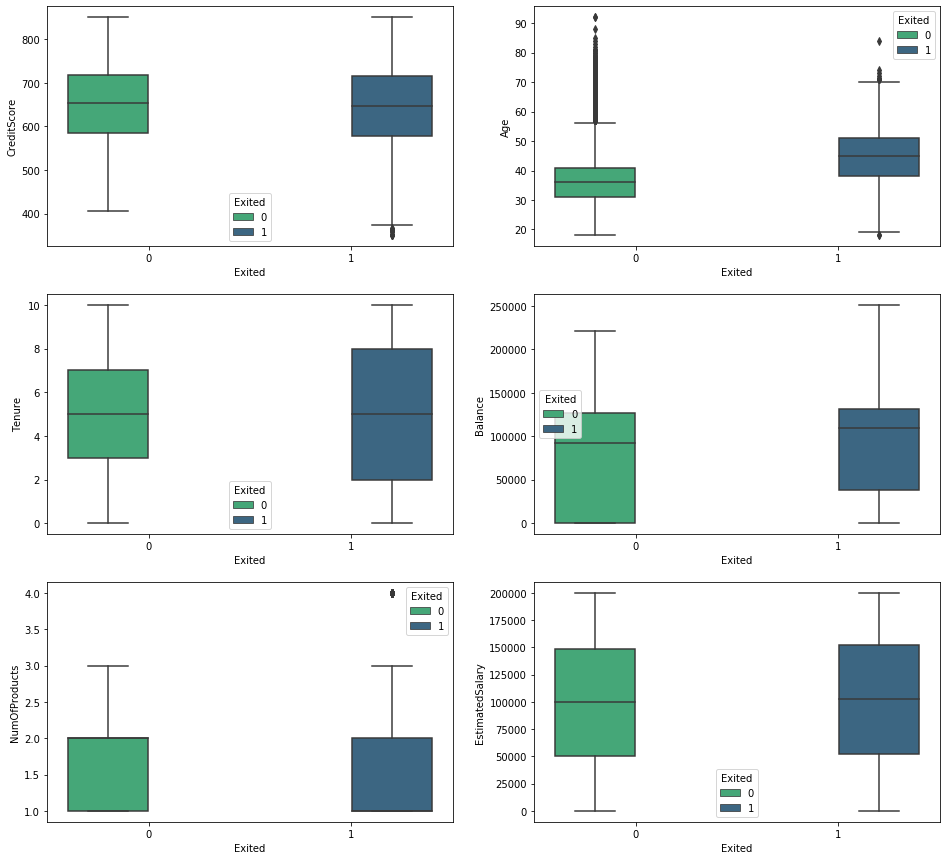

In [209]:
# Check & visualise outliers with boxplot

fig, axarr = plt.subplots(3, 2, figsize=(16, 15))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[0][0], palette="viridis_r")
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = churn , ax=axarr[0][1], palette="viridis_r")
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][0], palette="viridis_r")
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][1], palette="viridis_r")
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][0], palette="viridis_r")
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][1], palette="viridis_r");

In [210]:
"""
Distribution between clients retained and churned
CreditScore: There is no significant difference between clients retained and churned
Age: Older clients are more likely to leave the bank
Tenure: Not informtive
Balance: Not informative
NumOfProducts: Not informative
EstimatedSalary: Not informative

Outliers
CreditScore, Age and NumOfProducts outliers
"""

'\nDistribution between clients retained and churned\nCreditScore: There is no significant difference between clients retained and churned\nAge: Older clients are more likely to leave the bank\nTenure: Not informtive\nBalance: Not informative\nNumOfProducts: Not informative\nEstimatedSalary: Not informative\n\nOutliers\nCreditScore, Age and NumOfProducts outliers\n'

In [211]:
# Check Outliers through quantile
for feature in churn[['CreditScore','Age', "Tenure","Balance", 'NumOfProducts', "EstimatedSalary"]]:
    Q1 = churn[feature].quantile(0.25)
    Q3 = churn[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    if churn[(churn[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

CreditScore no
Age yes
Tenure no
Balance no
NumOfProducts yes
EstimatedSalary no


In [212]:
# check deeply outliers of NumOfProductshave

Q1 = churn['NumOfProducts'].quantile(0.25)
Q3 = churn['NumOfProducts'].quantile(0.75)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR
print(upper)

3.5


In [213]:
# outliers of NumOfProductshave Shape
outliers_NumOfProducts= churn.loc[churn.NumOfProducts>=3.5]
outliers_NumOfProducts.shape

(60, 14)

In [214]:
# check deeply outliers of Age

Q1 = churn['Age'].quantile(0.25)
Q3 = churn['Age'].quantile(0.75)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR
print(upper)

62.0


In [215]:
# outliers of Age shape
outliers_age= churn.loc[churn.Age>=62]
outliers_age.shape

(411, 14)

In [216]:
"""
We've seen we have outliers in Age & NumOfProductshave, but not enought to take them out. Also, 
those are outliers that might interest us.
We'll continue with them and see later if we need them or not once doing the model
"""

"\nWe've seen we have outliers in Age & NumOfProductshave, but not enought to take them out. Also, \nthose are outliers that might interest us.\nWe'll continue with them and see later if we need them or not once doing the model\n"

#### Distribution

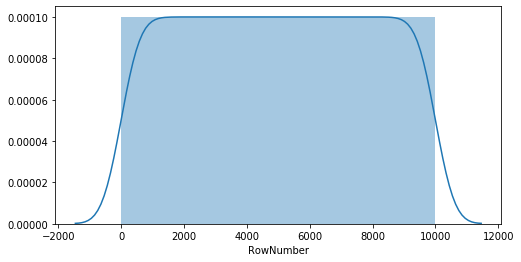

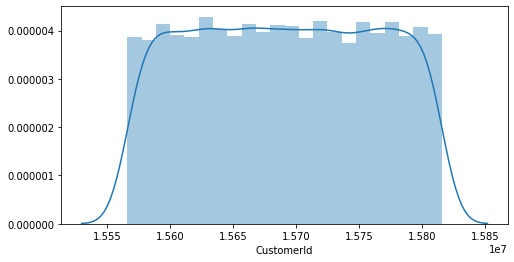

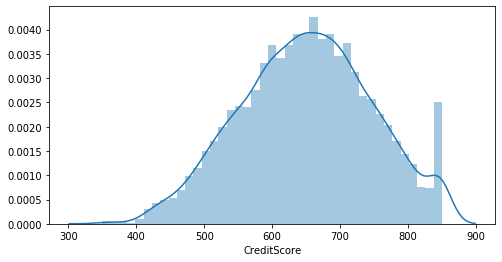

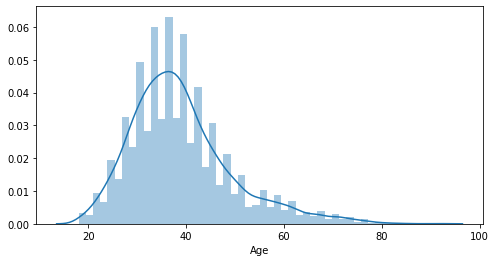

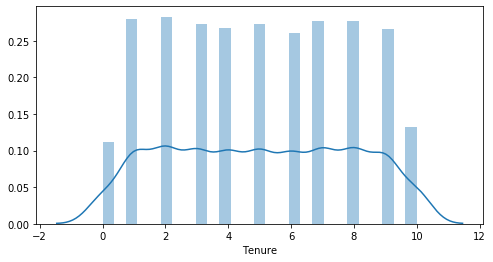

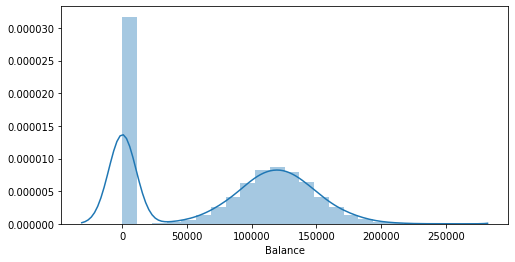

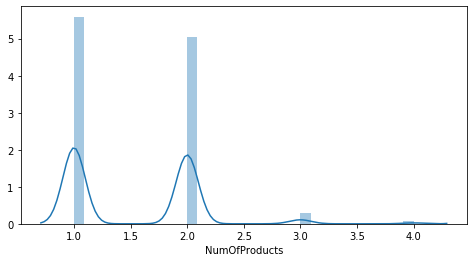

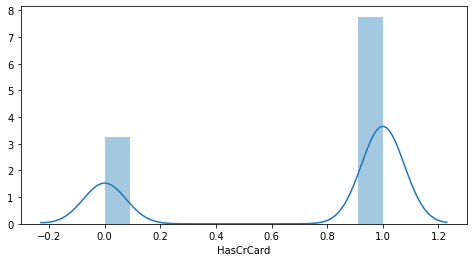

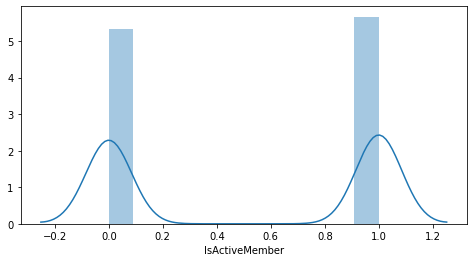

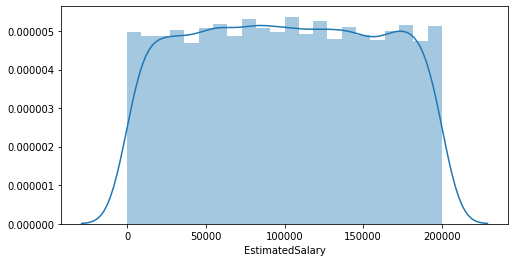

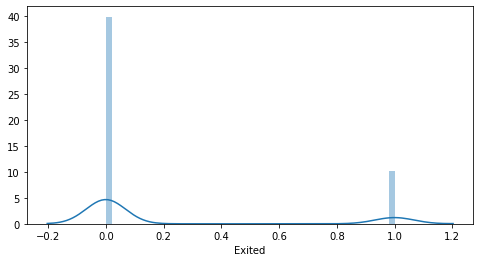

In [217]:
# Column-wise data distribution (to see if there is any distribution skewed)

for i in numeric:
    plt.figure(figsize=(8,4))
    sns.distplot(churn[i])

In [218]:
"""
We see that most of the variables don't have a normal distribution, and
the ones that have normal distribution is skewed.
"""

"\nWe see that most of the variables don't have a normal distribution, and\nthe ones that have normal distribution is skewed.\n"

### Clean Data

In [219]:
# check Nan values
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Transform Data

#### Creat dummy variables

In [220]:
# check unique values column Gender
churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [221]:
# check unique values column Geography
churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [222]:
# Create a new column with Gender dummy varibale
churn["Gender_int"]= [0 if value == "Male" else 1 for value in churn["Gender"]]

In [223]:
# Get dummies from column country
churn=pd.get_dummies(churn, columns=['Geography'])

In [224]:
# check changes in dataset
churn

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_int,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,Male,39,5,0.00,2,1,0,96270.64,0,0,1,0,0
9996,9997,15569892,Johnstone,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,1,0,0
9997,9998,15584532,Liu,709,Female,36,7,0.00,1,0,1,42085.58,1,1,1,0,0
9998,9999,15682355,Sabbatini,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,0,1,0


## 2.2_Feature_Selection

### Remove useless variables

In [225]:
# check unique values CustomerId
churn.CustomerId.value_counts()

15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64

In [226]:
# drop useless columns 
churn.drop(columns=[ "RowNumber", "CustomerId", "Surname"], inplace=True)

In [227]:
# check dataset
churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_int,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1


### Correlation

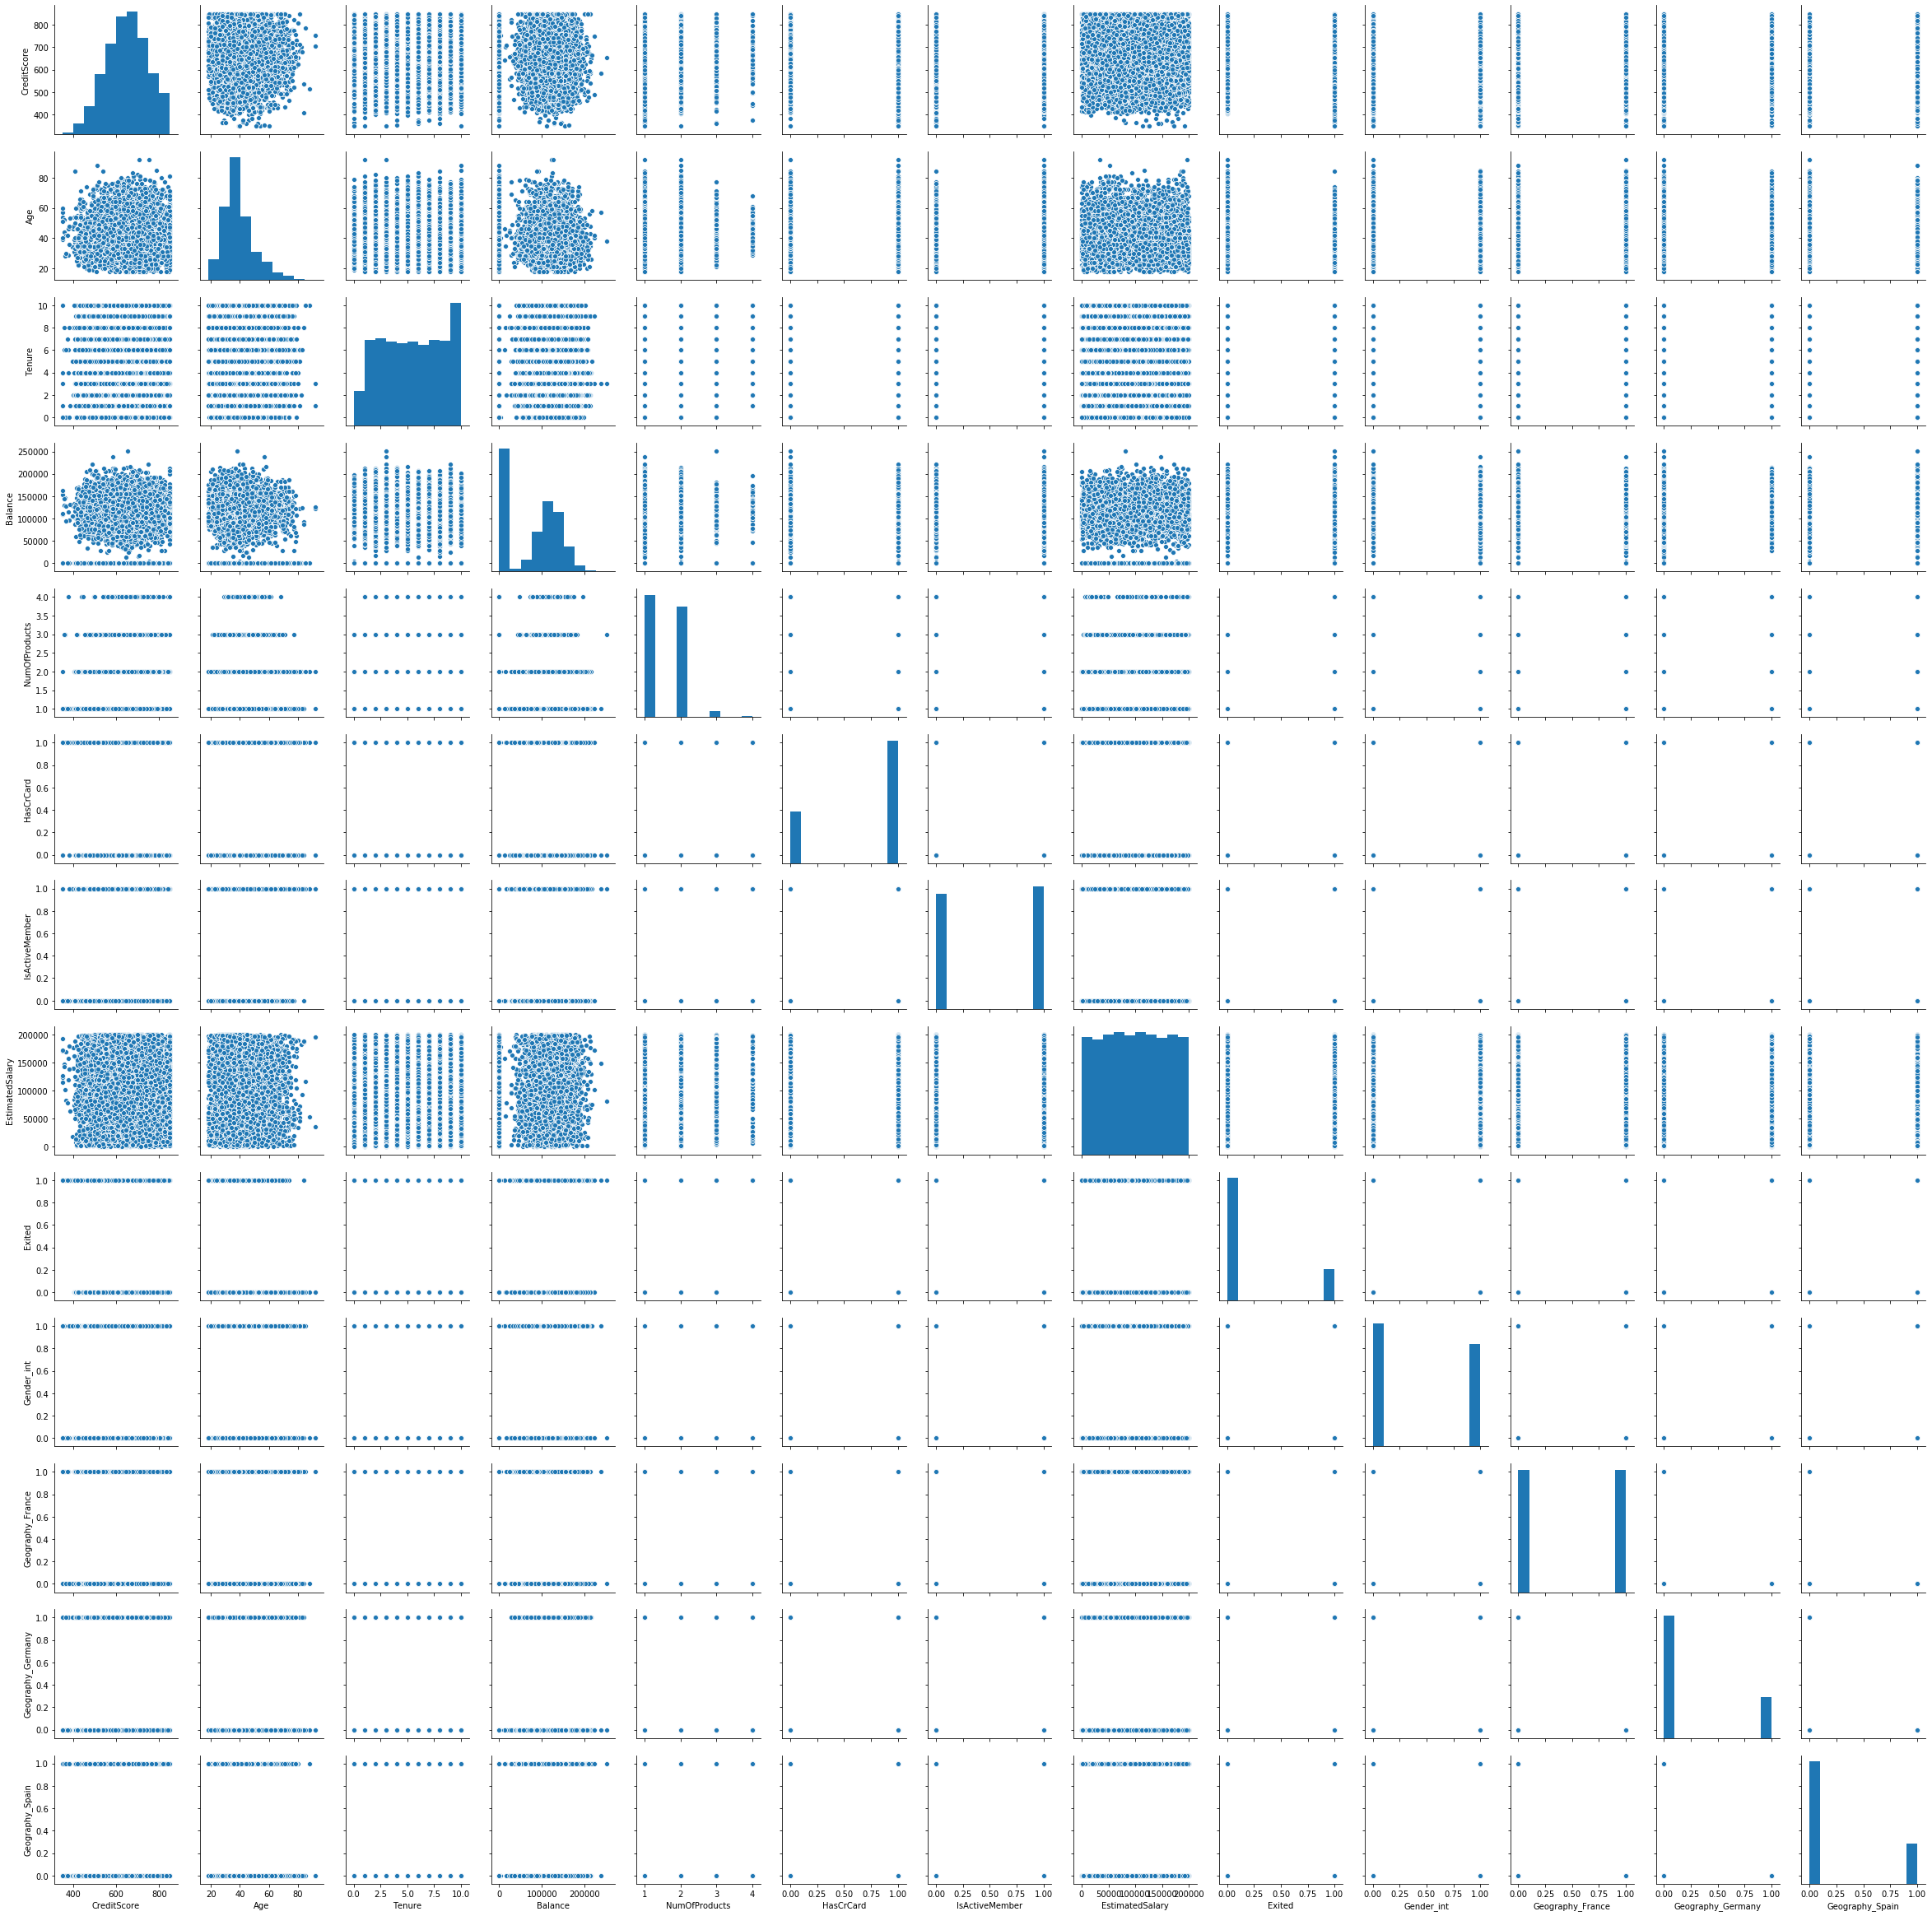

In [228]:
# Check correlation with pairplot
sns.pairplot(churn);

In [229]:
# Check variables closer

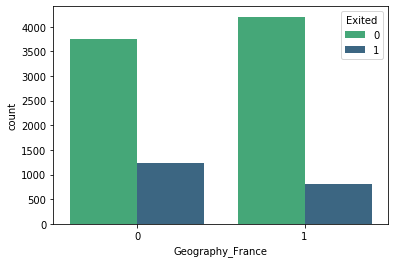

In [230]:
# Geography_France vs Exited 
sns.countplot(data=churn, x="Geography_France", hue="Exited", palette="viridis_r");

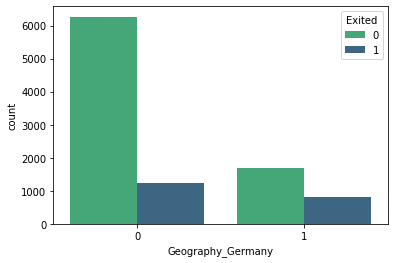

In [231]:
# Geography_Germany vs Exited 
sns.countplot(data=churn, x="Geography_Germany", hue="Exited", palette="viridis_r");

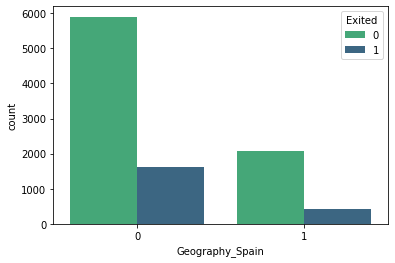

In [232]:
# Geography_Spain vs Exited 
sns.countplot(data=churn, x="Geography_Spain", hue="Exited", palette="viridis_r");

In [233]:
"""
The bank has more clients from France.
Proportionally, more clients fromGerman are leaving the bank.
"""

'\nThe bank has more clients from France.\nProportionally, more clients fromGerman are leaving the bank.\n'

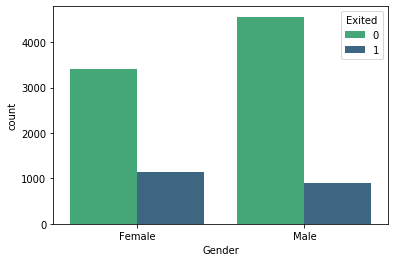

In [234]:
# Gender vs Exited 
sns.countplot(data=churn, x="Gender", hue="Exited", palette="viridis_r");

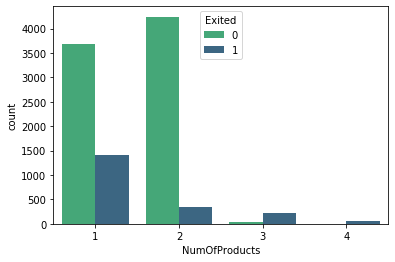

In [235]:
# NumOfProducts vs Exited 
sns.countplot(data=churn, x="NumOfProducts", hue="Exited", palette="viridis_r");

In [236]:
"""
Clients usually have 1 or 3 products.
"""

'\nClients usually have 1 or 3 products.\n'

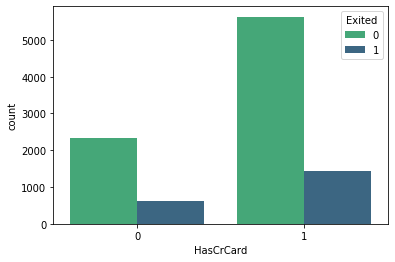

In [237]:
# HasCrCard vs Exited 
sns.countplot(data=churn, x="HasCrCard", hue="Exited", palette="viridis_r");

In [238]:
"""
Mayority of clients with credit card are likely to leave
"""

'\nMayority of clients with credit card are likely to leave\n'

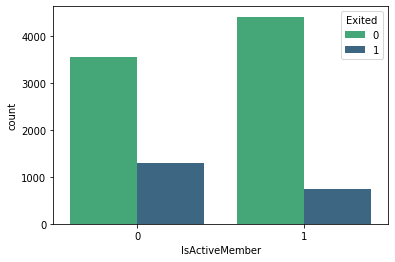

In [239]:
# IsActiveMember vs Exited 
sns.countplot(data=churn, x="IsActiveMember", hue="Exited", palette="viridis_r");

In [240]:
"""
inactive clients are likely to leave
"""

'\ninactive clients are likely to leave\n'

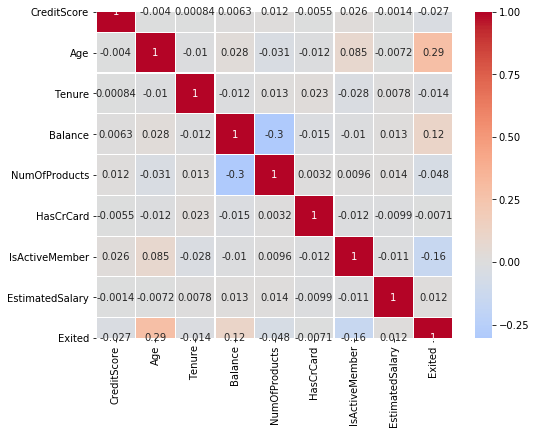

In [241]:
# Check correlation & check if we have collinearity
plt.subplots(figsize=(8,6))
sns.heatmap(churn[churn.columns[:10]].corr(),linewidths =0.2 ,cmap = 'coolwarm',center = 0,annot = True)
plt.yticks(rotation = 0);

In [242]:
"""
No correlation, nor collinearity is seen.
"""

'\nNo correlation, nor collinearity is seen.\n'

In [243]:
# check dataset before Feature Engineering
churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_int,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1


In [244]:
#Save clean data to csv
churn.to_csv("Churn.csv")

## 2.3_Feature_Engineering

### Transfrom (log)

In [246]:
# We'll only transform 2 columns ("Age" & "CreditScore") to log, 
# as are the only ones that seem to have a normal distribution but skewed.

churn_log=churn[["Age","CreditScore"]].applymap(np.log)

In [247]:
frames= [churn[["Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Gender_int","Geography_France","Geography_Germany","Geography_Spain","Exited"]],churn_log]
churn_log = pd.concat(frames, axis=1, sort=False)


In [248]:
churn_log

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_int,Geography_France,Geography_Germany,Geography_Spain,Exited,Age,CreditScore
0,2,0.00,1,1,1,101348.88,1,1,0,0,1,3.737670,6.428105
1,1,83807.86,1,0,1,112542.58,1,0,0,1,0,3.713572,6.410175
2,8,159660.80,3,1,0,113931.57,1,1,0,0,1,3.737670,6.218600
3,1,0.00,2,0,0,93826.63,1,1,0,0,0,3.663562,6.549651
4,2,125510.82,1,1,1,79084.10,1,0,0,1,0,3.761200,6.745236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,0.00,2,1,0,96270.64,0,1,0,0,0,3.663562,6.647688
9996,10,57369.61,1,1,1,101699.77,0,1,0,0,0,3.555348,6.246107
9997,7,0.00,1,0,1,42085.58,1,1,0,0,1,3.583519,6.563856
9998,3,75075.31,2,1,0,92888.52,0,0,1,0,1,3.737670,6.648985


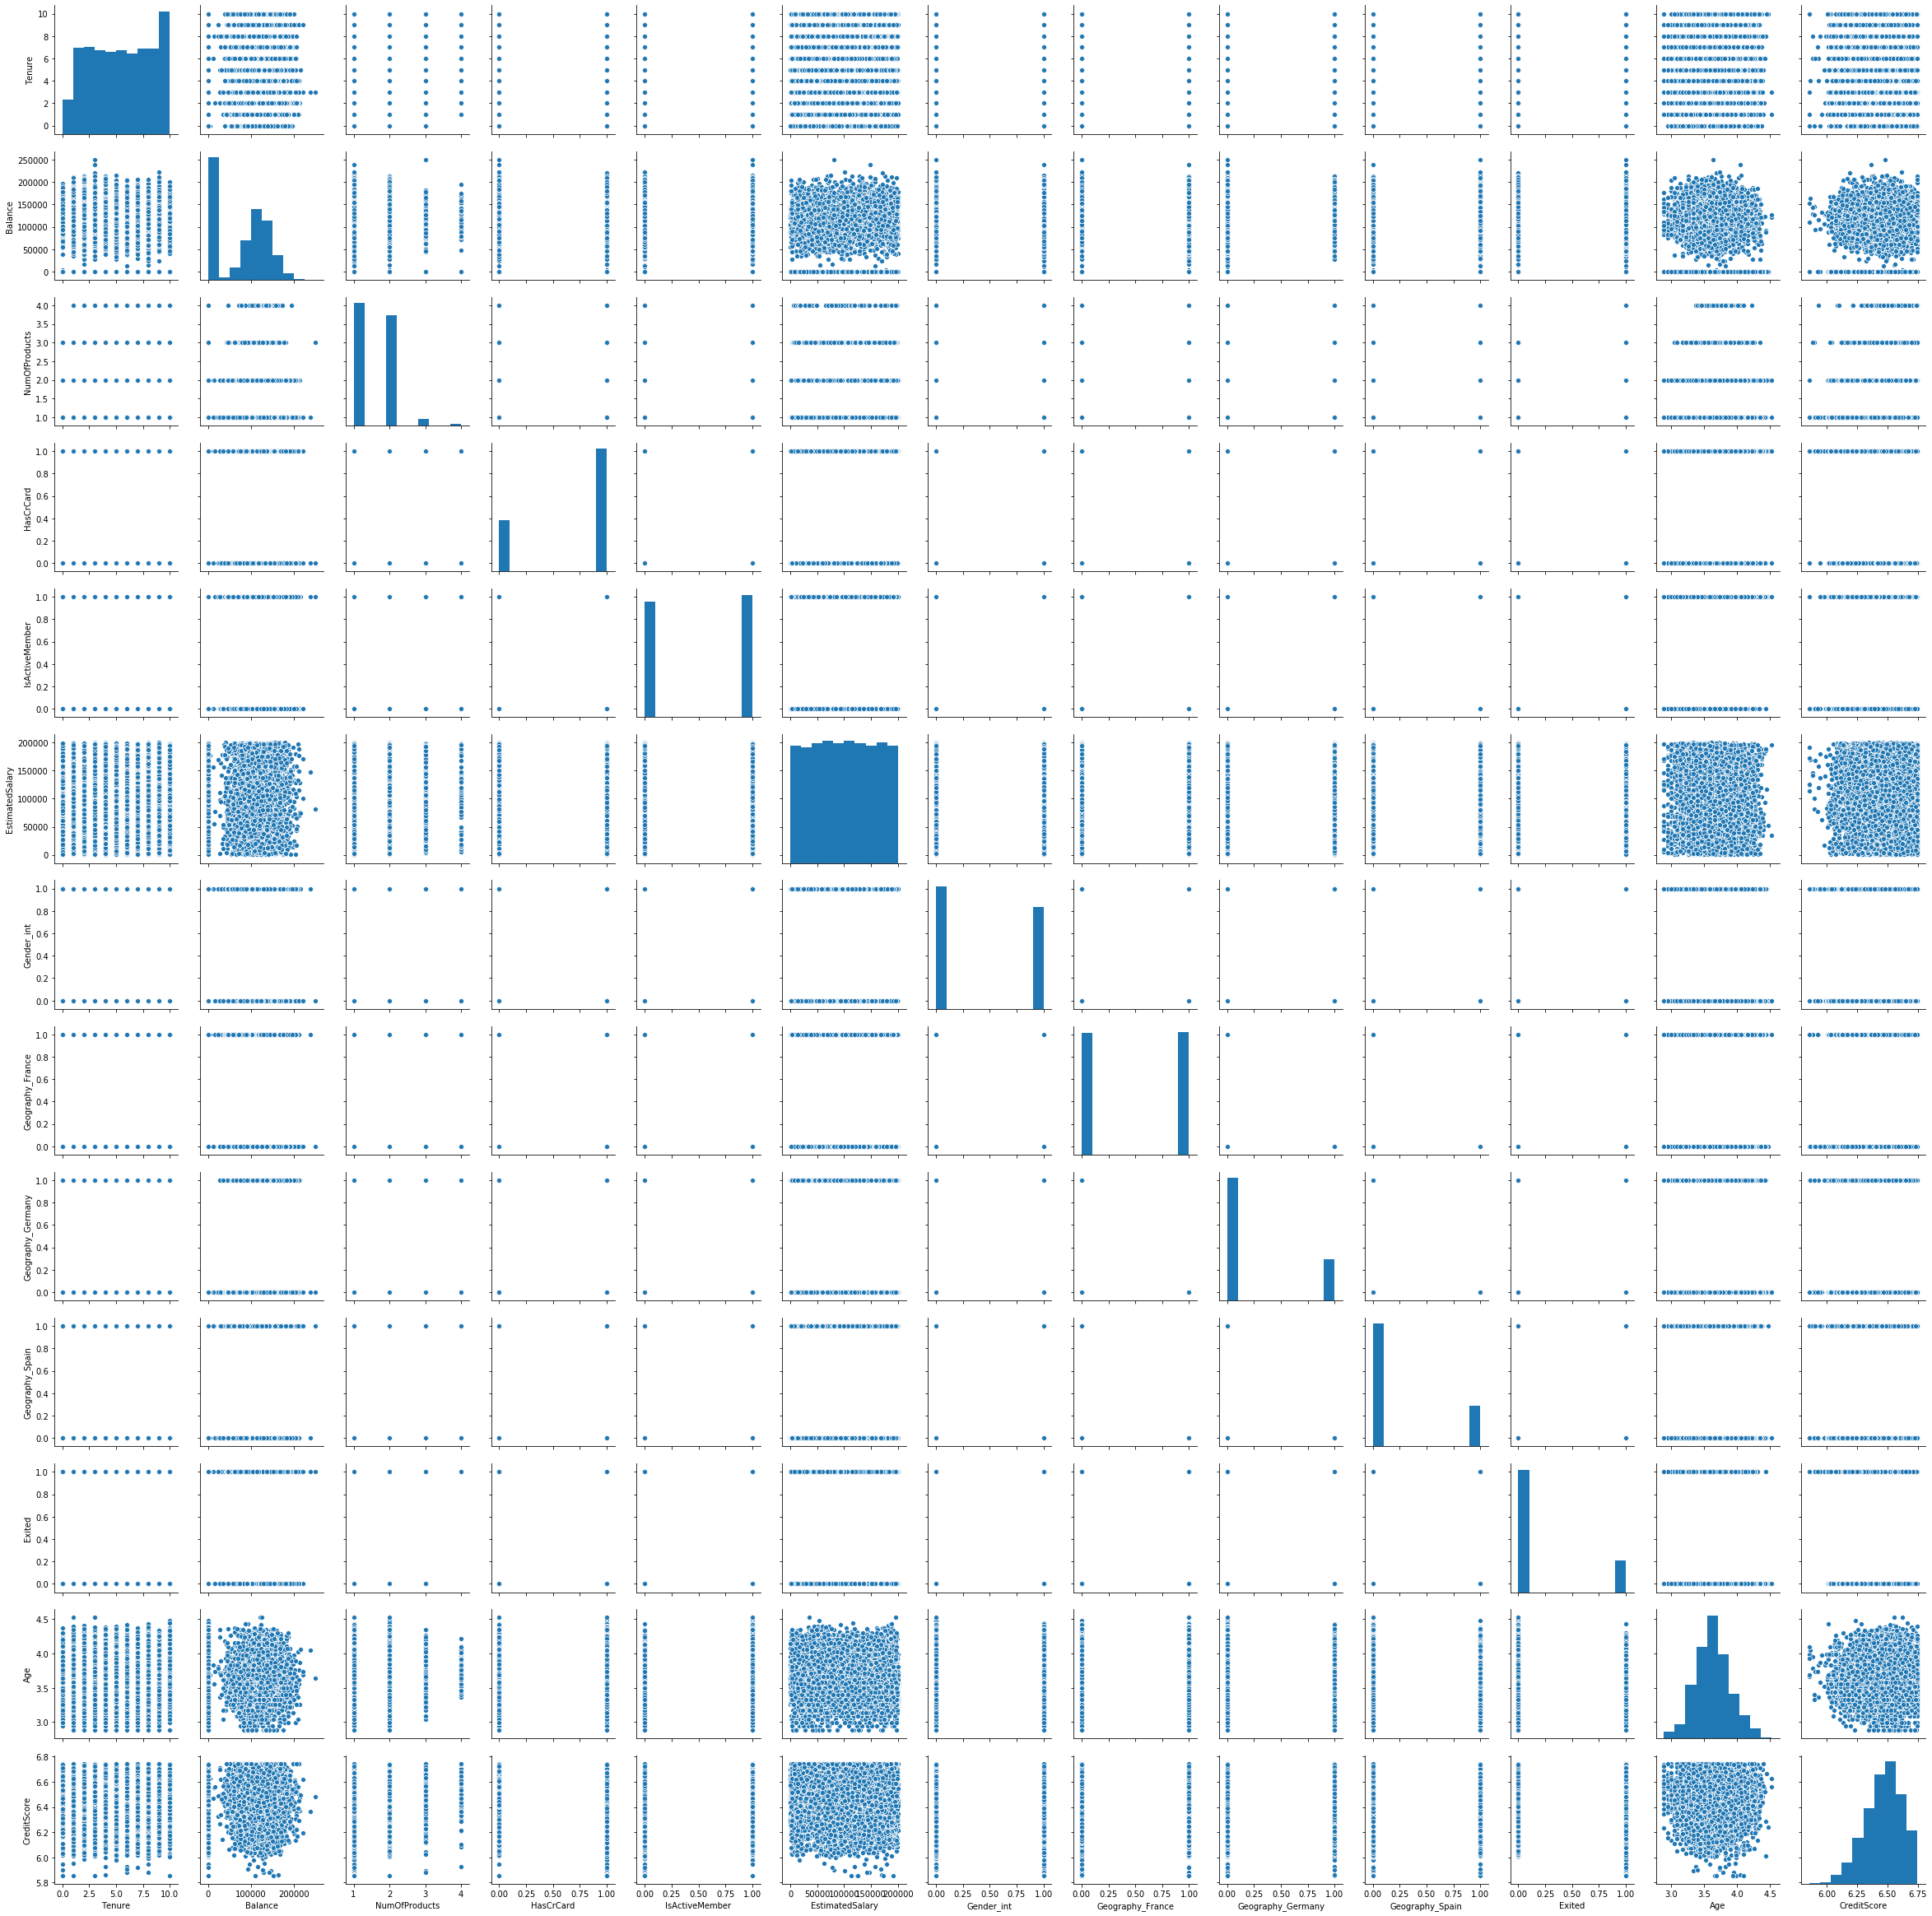

In [249]:
# Check correlation with log variables
sns.pairplot(churn_log);

In [251]:
#Save clean data to csv
churn_log.to_csv("Churn_log.csv")

### Standarized variables
Standardize features by removing the mean and scaling to unit variance

#### Standardize Numeric variables from Churn

In [252]:
# Selec numeric variables
numeric_norm= churn.select_dtypes(include=np.number)

In [253]:
# StandardScaler
scaler = StandardScaler()
print("Fit \n", scaler.fit(numeric_norm), "\n")
print("Mean \n", scaler.mean_, "\n")
print("Transform \n", scaler.transform(numeric_norm), "\n")

Fit 
 StandardScaler() 

Mean 
 [6.50528800e+02 3.89218000e+01 5.01280000e+00 7.64858893e+04
 1.53020000e+00 7.05500000e-01 5.15100000e-01 1.00090240e+05
 2.03700000e-01 4.54300000e-01 5.01400000e-01 2.50900000e-01
 2.47700000e-01] 

Transform 
 [[-0.32622142  0.29351742 -1.04175968 ...  0.99720391 -0.57873591
  -0.57380915]
 [-0.44003595  0.19816383 -1.38753759 ... -1.00280393 -0.57873591
   1.74273971]
 [-1.53679418  0.29351742  1.03290776 ...  0.99720391 -0.57873591
  -0.57380915]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ...  0.99720391 -0.57873591
  -0.57380915]
 [ 1.25683526  0.29351742 -0.69598177 ... -1.00280393  1.72790383
  -0.57380915]
 [ 1.46377078 -1.04143285 -0.35020386 ...  0.99720391 -0.57873591
  -0.57380915]] 



In [254]:
# Assign the transformed data to a new variable
churn_scale= scaler.transform(numeric_norm)

#### Standardize Numeric variables from Churn_log

In [255]:
# Selec numeric variables
numeric_log= churn_log.select_dtypes(include=np.number)

In [256]:
# StandardScaler
scaler = StandardScaler()
print("Fit \n", scaler.fit(numeric_log), "\n")
print("Mean \n", scaler.mean_, "\n")
print("Transform \n", scaler.transform(numeric_log), "\n")

Fit 
 StandardScaler() 

Mean 
 [5.01280000e+00 7.64858893e+04 1.53020000e+00 7.05500000e-01
 5.15100000e-01 1.00090240e+05 4.54300000e-01 5.01400000e-01
 2.50900000e-01 2.47700000e-01 2.03700000e-01 3.62762731e+00
 6.46632744e+00] 

Transform 
 [[-1.04175968 -1.22584767 -0.91158349 ...  1.97716468  0.42588308
  -0.24954461]
 [-1.38753759  0.11735002 -0.91158349 ... -0.50577476  0.33262132
  -0.36660842]
 [ 1.03290776  1.33305335  2.52705662 ...  1.97716468  0.42588308
  -1.61736042]
 ...
 [ 0.68712986 -1.22584767 -0.91158349 ...  1.97716468 -0.17070718
   0.63674072]
 [-0.69598177 -0.02260751  0.80773656 ...  1.97716468  0.42588308
   1.1925305 ]
 [-0.35020386  0.85996499 -0.91158349 ... -0.50577476 -1.14333824
   1.35951641]] 



In [258]:
# Assign the transformed data to a new variable
churn_log_scale= scaler.transform(numeric_log)